# Assignment 2
~ Neelanjan Goswami

## Question 1

In [24]:
import numpy as np

In [25]:
# Generating random 10 values and their mean
from random import randint
mean_1=[]
mean_2=[]

In [26]:
for i in range(1,11):
  value_1= randint(0,10)
  value_2= randint(0,10)
  mean_1.append(value_1)
  mean_2.append(value_2)
print(mean_1)
print(mean_2)

[6, 10, 3, 10, 3, 2, 10, 4, 4, 2]
[10, 4, 10, 3, 8, 9, 9, 7, 5, 8]


In [27]:
# Creating 10x10 diagonal matrices
import random
diag1=np.diag(random.sample(range(1,11),10))
diag2=np.diag(random.sample(range(1,11),10))
m=0

In [28]:
for m in range(5):
  diag1[random.randrange(10)][random.randrange(10)] = random.randrange(10)
  diag2[random.randrange(10)][random.randrange(10)] = random.randrange(10)
  m=-1
cov1=diag1
cov2=diag2

In [29]:
print(cov1)
print(cov1.shape)
print(cov2)
print(cov2.shape)

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 5 10  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  2  0  0  0]
 [ 0  0  0  3  0  0  0  0  6  0]
 [ 0  0  0  5  6  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  9]]
(10, 10)
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 5  9  0  0  0  0  0  9  0  0]
 [ 1  0  4  0  0  0  0  0  0  5]
 [ 0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  5]]
(10, 10)


In [30]:
a, b, c, d, e, f, g, h, i, j = np.random.multivariate_normal(mean_1,cov1,1000).T
A1 = np.vstack((a, b, c, d, e, f, g, h, i, j)).T
print(A1)

[[13.49157016 14.29302967  1.15598119 ...  4.01828259  2.08039717
  -0.28115877]
 [ 5.12659603 11.27872708  0.88365905 ...  2.54714698  4.87315631
  -2.66757553]
 [ 6.71147027  8.74532758  1.08608464 ...  2.46456922  0.62224944
   2.76707064]
 ...
 [ 4.80504739  6.93118507  2.28749529 ...  2.00521277  3.06457192
  -0.72324467]
 [ 3.90883114  8.6124594   1.93455394 ...  4.99381111 -3.17542061
   3.753817  ]
 [ 5.94661782 11.71732436  1.25172118 ...  7.02621688  7.0110667
   4.35289576]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


In [31]:
k, l, m, n, o, p, q, r, s, t = np.random.multivariate_normal(mean_2,cov2,1000).T
B1 = np.vstack((k, l, m, n, o, p, q, r, s, t)).T
print(B1)

[[14.95058568  4.51649086  8.6791933  ... 14.30549913  8.30837759
   8.05915659]
 [12.31215509  4.58610955  6.08117723 ... -0.33751384  5.17470873
   6.02294711]
 [ 6.96580588  4.12572393 10.70920744 ...  6.36233231  9.79186739
   4.72266248]
 ...
 [11.37958279  7.18028234 12.5443683  ...  6.7621523   4.09764139
   6.62249676]
 [ 7.87001288  5.46085121 13.14861941 ...  4.37248864  3.16316852
   7.77819005]
 [ 8.20596405  2.90621122 13.11255337 ...  9.60749665  5.4827959
   9.6196341 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


(2000, 10)


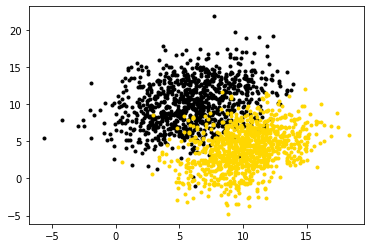

In [32]:
import matplotlib.pyplot as plt
plt.scatter(A1[:,0],A1[:,1], c='black', marker='.')
plt.scatter(B1[:,0],B1[:,1], c='gold' , marker='.')
ans=np.concatenate((A1,B1),axis=0)
print(ans.shape)

# Question 2

### Question 2A

In [33]:
center_mean = ans - np.mean(ans, axis=0)
cov= np.cov(center_mean, rowvar = False)
eigen_vector,eigen_value= np.linalg.eigh(cov)
sorted_index = np.argsort(eigen_vector)[::-1]
new_ev = eigen_vector[sorted_index]
new_eig_vec = eigen_value[:, sorted_index]
reduced_Dataset = np.dot(ans, new_eig_vec)

In [34]:
MSE_VAL=[]
for k in range(9,4,-1):
  Post_pca = reduced_Dataset[:,0:k]
  Post_pca = np.dot(Post_pca, new_eig_vec[:,0:k].T)
  MSE= sum(sum((Post_pca - ans)**2))/len(ans)
  MSE_VAL.append(MSE)
MSE_VAL.append(0)
MSE_VAL= [x for x in reversed (MSE_VAL)]
print("MSE values = ",MSE_VAL)
x=MSE_VAL

MSE values =  [0, 177.97672012132873, 170.7850087259847, 159.5728507432131, 104.4219195106757, 61.16395208235856]


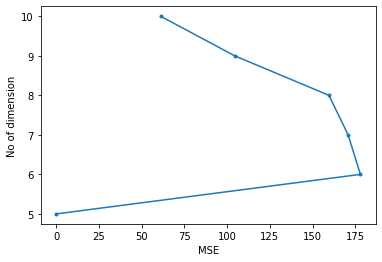

In [35]:
yplot = [5,6,7,8,9,10]
plt.plot(x,yplot,marker='.')
plt.ylabel("No of dimension")
plt.xlabel("MSE")
plt.show()

### Question 2B

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
scores=[]

In [37]:
Xc=np.zeros(1000)
Y=np.concatenate((Xc,np.ones(1000)))
for i in range(1, 10):
  X_train= ans[:1500,:-i]
  y_train= Y[:1500]
  X_test= ans[1500:,:-i]
  y_test= Y[1500:]
  model = LDA()
  model.fit(X_train , y_train)
  y_preds=model.predict(X_test)
  scores=np.append(scores,accuracy_score(y_test,y_preds))
  print(accuracy_score(y_test,y_preds))

0.998
0.998
0.998
0.998
0.998
0.998
0.992
0.894
0.59


In [38]:
print(scores)

[0.998 0.998 0.998 0.998 0.998 0.998 0.992 0.894 0.59 ]


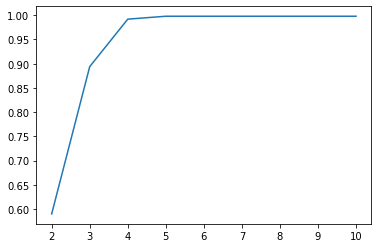

In [39]:
plt.plot([10,9,8,7,6,5,4,3,2],scores)

# Question 3

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
LDA=LinearDiscriminantAnalysis()

In [41]:
Xc=np.zeros(1000)
Y=np.concatenate((Xc,np.ones(1000)))
X_mod=ans.copy()
scores=np.array([])
scr_plt=np.array([])

In [42]:
for i in range(0,9):
  for j in range(0,X_mod.shape[1]):
    LDA.fit(np.delete(X_mod,j,1),Y.ravel())
    y_preds=LDA.predict(np.delete(X_mod,j,1))
    scores=np.append(scores,accuracy_score(Y.ravel(),y_preds))
  print("Number of of attributes removed:", i+1)
  print("Accuracies:", scores)
  drop=np.argsort(scores)[::-1]
  X_mod=np.delete(X_mod,drop[0],1)
  print("Accuracy after removing: ",scores[drop[0]],"\n")
  scr_plt=np.append(scr_plt,scores[drop[0]])
  scores=np.array([])

Number of of attributes removed: 1
Accuracies: [0.9995 1.     1.     1.     0.9995 0.9995 1.     1.     1.     1.    ]
Accuracy after removing:  1.0 

Number of of attributes removed: 2
Accuracies: [0.9995 1.     1.     0.9995 0.9995 0.9995 1.     1.     1.    ]
Accuracy after removing:  1.0 

Number of of attributes removed: 3
Accuracies: [0.9995 1.     1.     0.9995 0.9995 0.9995 1.     1.    ]
Accuracy after removing:  1.0 

Number of of attributes removed: 4
Accuracies: [0.9995 0.9995 1.     0.9995 0.9995 0.9995 1.    ]
Accuracy after removing:  1.0 

Number of of attributes removed: 5
Accuracies: [0.9995 0.999  1.     0.9995 0.9995 0.9995]
Accuracy after removing:  1.0 

Number of of attributes removed: 6
Accuracies: [1.     0.9995 0.9945 0.999  0.999 ]
Accuracy after removing:  1.0 

Number of of attributes removed: 7
Accuracies: [0.999  0.989  0.9965 0.9965]
Accuracy after removing:  0.999 

Number of of attributes removed: 8
Accuracies: [0.981  0.994  0.9945]
Accuracy after rem

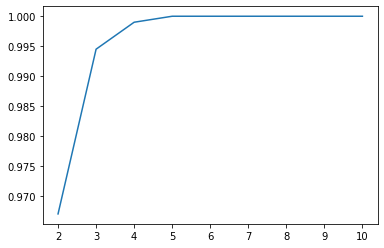

In [44]:
plt.plot([10,9,8,7,6,5,4,3,2],scr_plt)

# Question 4

The results show that when applied to data, Backward Feature selection provides more accuracy than PCA. The dimensions are decreased using PCA without taking the target variable into account. The greedy method of backward selection identifies the best characteristics.